In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd

In [18]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#inspector = inspect(engine)
#columns = inspector.get_columns('hawaii')
#for c in columns:
#    print(c['name'], c["type"])
Base = automap_base()
Base.prepare(engine, reflect=True)
Hawaii = Base.classes.keys()
Hawaii

['measurement', 'station']

In [ ]:
# reflect an existing database into a new model

# reflect the tables

In [ ]:
# We can view all of the classes that automap found


In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
Climate_session = Session(engine)
results = Climate_session.query(Measurement.date,Measurement.prcp).all()


# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

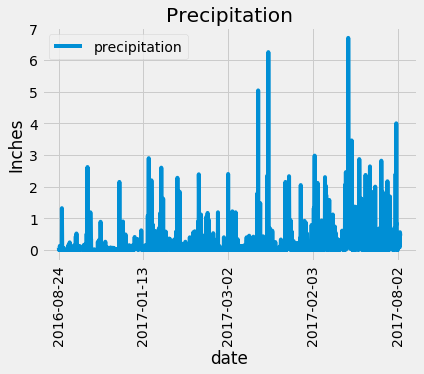

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
last_date = Climate_session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date
# Perform a query to retrieve the data and precipitation scores
last_year_precip = Climate_session.query(Measurement.date, Measurement.prcp).\
              filter(Measurement.date > '2016-08-23').all()
last_year_precip

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(last_year_precip, columns=['date', 'precipitation'])
precip_df.set_index('date', inplace=True)
#dropping rows with Nan
cleaned_precip_df=precip_df.dropna(axis=0,how='any')
# Sort the dataframe by date
cleaned_precip_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
cleaned_precip_df.plot()
plt.title("Precipitation")
plt.ylabel("Inches")
plt.xticks(rotation='vertical')

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
cleaned_precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [32]:
# Design a query to show how many stations are available in this dataset?
no_stations = Climate_session.query(Station).count()
no_stations

9

In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = engine.execute('SELECT * FROM Station').fetchall()
print('Stations')
print('-'*100)
print(stations)
print('-'*100)

inspector = inspect(engine)
print("Columns in Stations")
print('-'*100)
st_columns = inspector.get_columns('Station')
for col in st_columns:
    print(col['name'], col["type"])
print('-'*100)

Stations
----------------------------------------------------------------------------------------------------
[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]
----------------------------------------------------------------------------------------------------
Columns in Stations
-----------------------------------------------------------------------

In [34]:
measurements = engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()
print('Measurements')
print('-'*100)
print(measurements)
print('-'*100)
print("Columns in Measurement")
print('-'*100)
meas_columns = inspector.get_columns('Measurement')
for col in meas_columns:
    print(col['name'], col["type"])
print('-'*100)

Measurements
----------------------------------------------------------------------------------------------------
[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0), (6, 'USC00519397', '2010-01-07', 0.06, 70.0), (7, 'USC00519397', '2010-01-08', 0.0, 64.0), (8, 'USC00519397', '2010-01-09', 0.0, 68.0), (9, 'USC00519397', '2010-01-10', 0.0, 73.0), (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]
----------------------------------------------------------------------------------------------------
Columns in Measurement
----------------------------------------------------------------------------------------------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----------------------------------------------------------------------------------------------------


In [35]:
#session = Session(engine)
grouped_by_stations = Climate_session.query(func.count(Measurement.station),Measurement.station).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).\
filter(Measurement.station== Station.station).all()

most_active = Climate_session.query(Measurement.station,Station.name).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).\
filter(Measurement.station== Station.station).first()
                                    
#print(grouped_by_stations)
#max(grouped_by_stations)[1]
print('-'*100)
print(f"The most active station is {most_active}")
print('-'*100)
print('Stattions and counts in the descending order')
grouped_by_stations


----------------------------------------------------------------------------------------------------
The most active station is ('USC00519281', 'WAIHEE 837.5, HI US')
----------------------------------------------------------------------------------------------------
Stattions and counts in the descending order


[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
t_max =Climate_session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
t_min=Climate_session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

t_avg = Climate_session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f'The maximum temperature is {str(t_max[0])} Farenheight')
print(f'The minimum temperature is {str(t_min[0])} Farenheight')
print(f'The average temperature is {str(t_avg[0])} Farenheight')


The maximum temperature is (85.0,) Farenheight
The minimum temperature is (54.0,) Farenheight
The average temperature is (71.66378066378067,) Farenheight


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Station with highest no.of temperature observations
(2772, 'USC00519281', 'WAIHEE 837.5, HI US')


Text(0.5, 0, 'Temperature(F)')

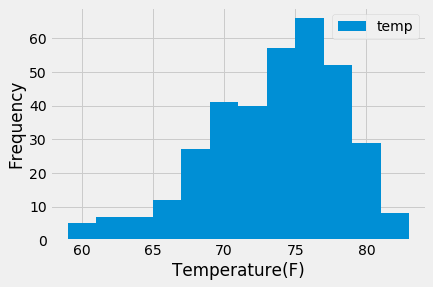

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
grouped_by_stations1 = Climate_session.query(func.count(Measurement.tobs),Measurement.station,Station.name).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).\
filter(Measurement.station== Station.station).first()
print('--'*100)
print("Station with highest no.of temperature observations")
print(grouped_by_stations1)
last_year_temp = Climate_session.query(Measurement.date, Measurement.tobs).\
              filter(Measurement.date > '2016-08-23').\
              filter(Measurement.station==grouped_by_stations1[1]).all()
last_year_temp
temp_df = pd.DataFrame(last_year_temp, columns=['date', 'temp'])
temp_df.set_index('date', inplace=True)
temp_df.plot(kind='hist',bins=12)
plt.xlabel("Temperature(F)")

## Bonus Challenge Assignment

In [40]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return Climate_session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-07-01', '2017-07-06'))

[(74.0, 78.39393939393939, 87.0)]


Text(0, 0.5, 'Temp (F)')

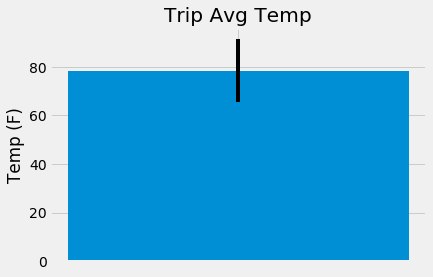

In [42]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
t_min = calc_temps('2017-07-01', '2017-07-06')[0][0]
t_avg = calc_temps('2017-07-01', '2017-07-06')[0][1]
t_max = calc_temps('2017-07-01', '2017-07-06')[0][2]
plt.bar(x="",height=t_avg,width=0.1,yerr=t_max-t_min)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Climate_session.query(func.sum(Measurement.prcp),Station.name,Station.latitude,Station.longitude,Station.elevation).\
        group_by(Measurement.station).\
        filter(Measurement.date >= '2017-07-01').filter(Measurement.date <= '2017-07-06').\
        filter(Measurement.station== Station.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()


[(1.02, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (0.46, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (0.27, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (0.12, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (0.02, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (None, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (None, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]

In [84]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return Climate_session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
temp=daily_normals("01-01")

'[(62.0'

In [93]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start = "2020-07-01"
end = "2020-07-06"

# Use the start and end date to create a range of dates
#datetime objects
dt_start = dt.date(int(start.split('-')[0]), 
                   int(start.split('-')[1]),
                   int(start.split('-')[2]))
dt_end = dt.date(int(end.split('-')[0]), 
                   int(end.split('-')[1]),
                   int(end.split('-')[2]))

dt_date = dt_start
dates =[]
while dt_date <= dt_end:
    dates.append(str(dt_date))
    #print(dt_date)
    dt_date = dt_date+dt.timedelta(1) 
print(dates)
print('-'*100)

# Stip off the year and save a list of %m-%d strings
dates_trip=[]
for trip_dates in dates:
    #print(trip_dates.split('-')[1]+'-'+trip_dates.split('-')[2])
    dates_trip.append(trip_dates.split('-')[1]+'-'+trip_dates.split('-')[2])

# Loop through the list of %m-%d strings and calculate the normals for each date
normals=[]
for n_trip_dates in dates_trip:
    #print(daily_normals(n_trip_dates))
    normals.append(daily_normals(n_trip_dates))
normals

['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06']
----------------------------------------------------------------------------------------------------


[[(67.0, 74.77777777777777, 81.0)],
 [(68.0, 75.40384615384616, 82.0)],
 [(68.0, 75.32075471698113, 87.0)],
 [(70.0, 76.57142857142857, 81.0)],
 [(66.0, 75.0, 81.0)],
 [(69.0, 75.0, 81.0)]]

In [125]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` inde
str(normals[0])[2:6]
float(str(normals[0])[8:12])
float(str(normals[0])[-7:-2])
tmin=[]
tavg=[]
tmax=[]
for normal in normals:
    #print(normal[0][0])
    tmin.append(normal[0][0])
    tavg.append(normal[0][1])
    tmax.append(normal[0][2])
tmin
d_normals ={'date':dates,'tmin':tmin,'tavg':tavg,'tmax':tmax}
df_normals = pd.DataFrame(data=d_normals)
df_normals.set_index('date', inplace=True)
df_normals

,tmin,tavg,tmax
date,,,
2020-07-01,67.0,74.777778,81.0
2020-07-02,68.0,75.403846,82.0
2020-07-03,68.0,75.320755,87.0
2020-07-04,70.0,76.571429,81.0
2020-07-05,66.0,75.000000,81.0
2020-07-06,69.0,75.000000,81.0


Text(0, 0.5, 'Temp (F)')

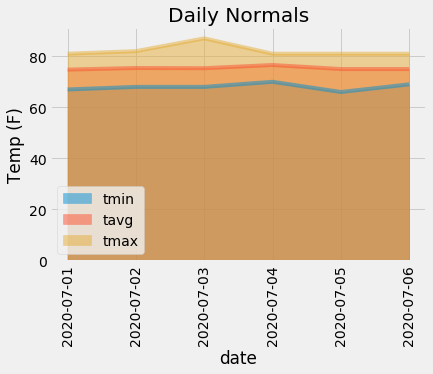

In [130]:
# Plot the daily normals as an area plot with `stacked=False`
df_normals.plot.area(stacked=False)
plt.xticks(rotation='vertical')
plt.title("Daily Normals")
plt.ylabel("Temp (F)")

In [174]:
from scipy import stats
sel = [func.avg(Measurement.tobs)]
avg_dec=Climate_session.query(*sel).filter(func.strftime("%m", Measurement.date) == "12").all()
avg_june=Climate_session.query(*sel).filter(func.strftime("%m", Measurement.date) == "06").all()

print('The average temperature in june =' + str(avg_june))
print('The average temperature in december =',avg_dec)
list_june=Climate_session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
list_dec=Climate_session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()
#performed a paired t-test, the temperatures are measure under different conditions and
# variaces are not assumed the same
stats_=stats.ttest_ind(list_june, list_dec, equal_var = False)

print("The t-test results are: t-stat = ",stats_[0],"p-value =", stats_[1])
print("The temperatures in December are significantly different than the temperatures in June")

The average temperature in june =[(74.94411764705882,)]
The average temperature in december = [(71.04152933421226,)]
The t-test results are: t-stat =  [31.35503692] p-value = [4.19352984e-187]
The temperatures in December are significantly different than the temperatures in June
